## Time-series forecasting of streaflow using LSTM neural networks
This project aims to use LSTM neural networks to predict streamflow based on historical weather, soil, and hydrological data. By feeding sequences of past conditions (e.g., temperature, precipitation, soil water content) into an LSTM model, the system forecasts future streamflow. The outcome helps decision-makers plan for water usage, prevent disasters like floods, and improve environmental sustainability.

In [119]:
# Import necessary libraries
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Step 1: Load the dataset

In [120]:
# Replace the path with the actual location of your dataset
# The dataset used here is real dataset collected from various checkpoint of a streamflow from Nepal
data = pd.read_csv("project/camels-np/240.0.csv")

## Step 2: Define features and target variable

In [121]:
# 'features' are the input variables used to predict the target 'streamflow'
features = [
    'date',
    'snow_depth_water_equivalent_mean',
    'surface_net_solar_radiation_mean',
    'surface_net_thermal_radiation_mean',
    'surface_pressure_mean',
    'temperature_2m_mean',
    'dewpoint_temperature_2m_mean',
    'u_component_of_wind_10m_mean',
    'v_component_of_wind_10m_mean',
    'volumetric_soil_water_layer_1_mean',
    'volumetric_soil_water_layer_2_mean',
    'volumetric_soil_water_layer_3_mean',
    'volumetric_soil_water_layer_4_mean',
    'total_precipitation_sum',
    'potential_evaporation_sum' 
]

# Target variable (streamflow)
target = 'streamflow'

In [122]:
# Separate the input features (X) and target variable (y)
X = data[features]
y = data[target]

## Step 3: Preprocessing the 'date' feature

In [123]:
# Converting date column into numerical form
# The 'date' column is encoded as numerical values to make it compatible with the model
le = LabelEncoder()
X['date'] = le.fit_transform(X['date'])

C:\Users\Bimarsh\AppData\Local\Temp\ipykernel_24924\3336687071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = le.fit_transform(X['date'])


## Step 4: Scale the feature data

In [124]:
# Normalizing data
# Scaling ensures all features contribute equally to the model and prevents dominance of features with large values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X.drop('date', axis=1))  # Exclude 'date' column for scaling

In [125]:
# scaler_y = MinMaxScaler()
# y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

## Step 5: Create sequences for time-series forecasting

In [126]:
# Sequence length determines the number of past time steps used to predict the next step
sequence_length = 30 
# Adjust as needed based on data characteristics here I used past 30 time steps for prediction

X_sequences, y_sequences = [], []
for i in range(len(scaled_data) - sequence_length):
    X_sequences.append(scaled_data[i: i+sequence_length,:-1])
    y_sequences.append(scaled_data[i+sequence_length, -1])
    # X_sequences.append(np.hstack([X['date'].iloc[i:i+sequence_length].values.reshape(-1, 1), X_scaled[i:i+sequence_length]]))
    # y_sequences.append(y.iloc[i+sequence_length])

In [127]:
# Convert the sequences to numpy arrays for model compatibility
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

In [128]:
X_sequences.shape

(14579, 30, 13)

In [129]:
y_sequences.shape

(14579,)

## Slicing the features and targets and converting to numpy arrays

In [130]:

train_size = int(len(X_sequences) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [131]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (11663, 15)
Shape of y_train: (11663,)
Shape of X_test: (2946, 15)
Shape of y_test: (2946,)


## Step 6: Split the data into training and testing sets

In [132]:
# Use 80% of the data for training and the remaining 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

## Step 7: Build the LSTM model

In [ ]:
# Sequential model: Layers are added one by one
model = Sequential()
# model.add(Embedding(input_dim=len(le.classes_), output_dim=10))# input_length=sequence_length))



In [ ]:
# Add the first LSTM layer
model.add(LSTM(units=64, input_shape=(30,13), return_sequences=True))
# `units=64`: Number of neurons in the LSTM layer
# `return_sequences=True`: Allows stacking of another LSTM layer

In [ ]:
# Add a second LSTM layer
model.add(LSTM(units=32))
# `return_sequences=False` by default as this is the last LSTM layer

In [ ]:
# Add a dense output layer with one unit for regression
model.add(Dense(units=1))

In [ ]:
# Compile the model
# Use Adam optimizer and Mean Squared Error (MSE) loss for regression
model.compile(optimizer='adam', loss='mean_squared_error')

## Step 8: Train the model

In [134]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0194 - val_loss: 0.0092
Epoch 2/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0088 - val_loss: 0.0072
Epoch 3/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 4/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 5/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 6/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 7/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 8/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 9/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0053 - val_loss: 0.0056
Epoch 10/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 11/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 12/100
365/365 ━━━━━━━━━━━━━━━━━━━━

In [135]:
# last_sequence = scaled_data[-sequence_length:]
# # last_sequence = np.hstack([X['date'].iloc[-sequence_length:].values.reshape(-1, 1), last_sequence])
# #last_sequence = np.hstack([X['date'].iloc[-sequence_length:].values.reshape(-1, 1), X_scaled[-sequence_length:]])
# last_sequence = last_sequence.reshape((1, sequence_length, len(features)))
# print(last_sequence.shape)
# predicted_streamflow = model.predict(last_sequence)

# print("Predicted streamflow for the next day:", predicted_streamflow)

## Step 9: Make predictions on the test set

In [136]:
# Predictions represent the model's output for unseen data
predictions = model.predict(X_test)
print(predictions)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[0.46583676]
 [0.5944425 ]
 [0.38132465]
 ...
 [0.11165953]
 [0.46057385]
 [0.3957582 ]]


In [137]:
predictions.shape

(2916, 1)

In [138]:
y_test.shape

(2916,)

## Plotting different types of plot using matplotlib for streamflow prediction for different time steps

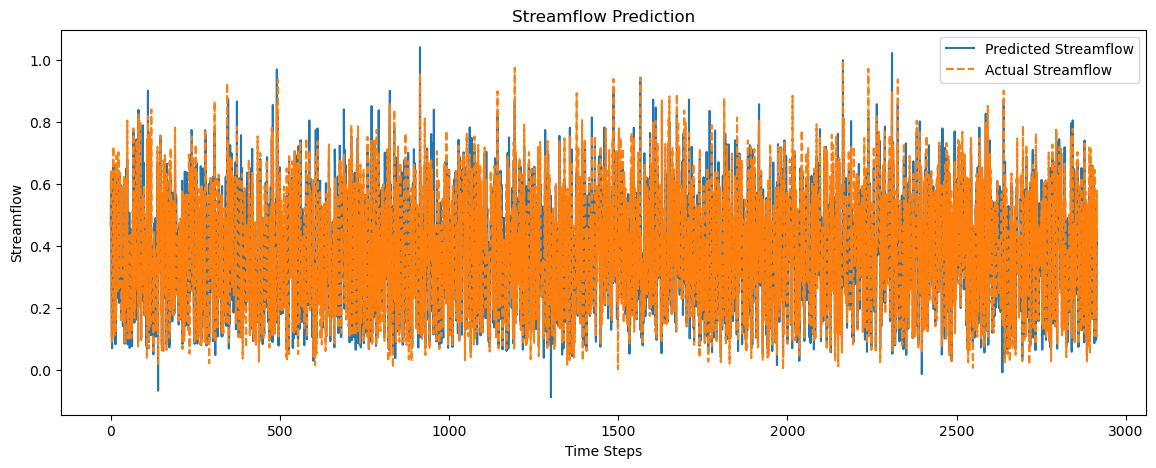

In [139]:
plt.figure(figsize=(14, 5))
plt.plot(predictions, label='Predicted Streamflow')
plt.plot(y_test, label='Actual Streamflow', linestyle='--')
plt.title('Streamflow Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Streamflow')
plt.legend()
plt.show()

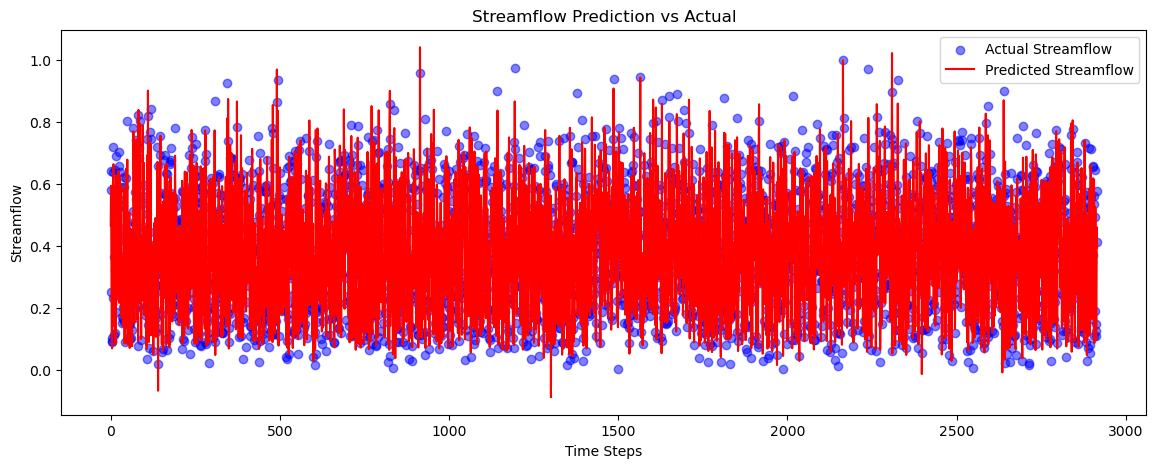

In [140]:
plt.figure(figsize=(14, 5))

# Scatter plot for actual streamflow values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Streamflow', alpha=0.5)

# Line plot for predicted streamflow values
plt.plot(predictions, color='red', label='Predicted Streamflow')

# Add title and labels
plt.title('Streamflow Prediction vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Streamflow')

# Add a legend
plt.legend()

# Display the plot
plt.show()

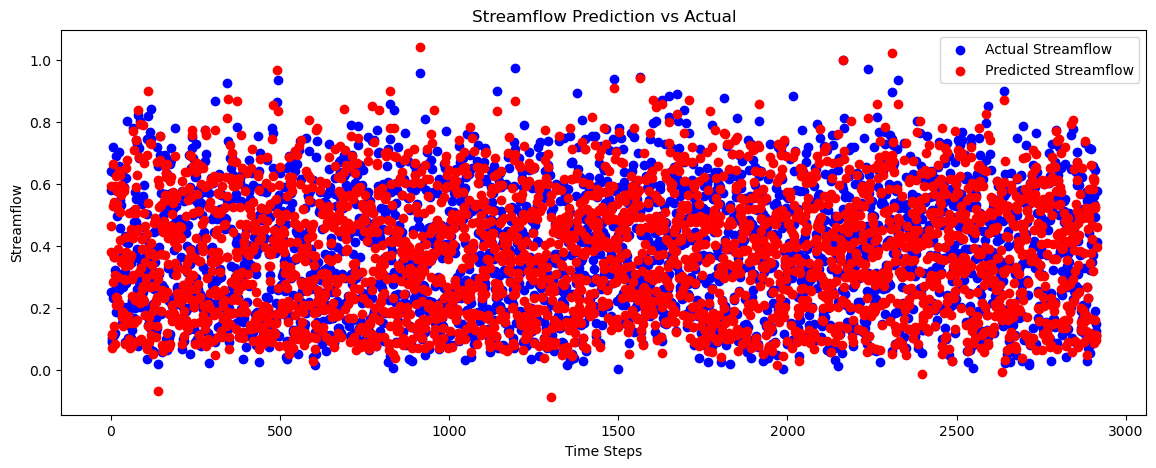

In [141]:
plt.figure(figsize=(14, 5))
plt.scatter(range(len(y_test)), y_test, label='Actual Streamflow', color='blue')
plt.scatter(range(len(predictions)), predictions, label='Predicted Streamflow', color='red')
plt.title('Streamflow Prediction vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Streamflow')
plt.legend()
plt.show()

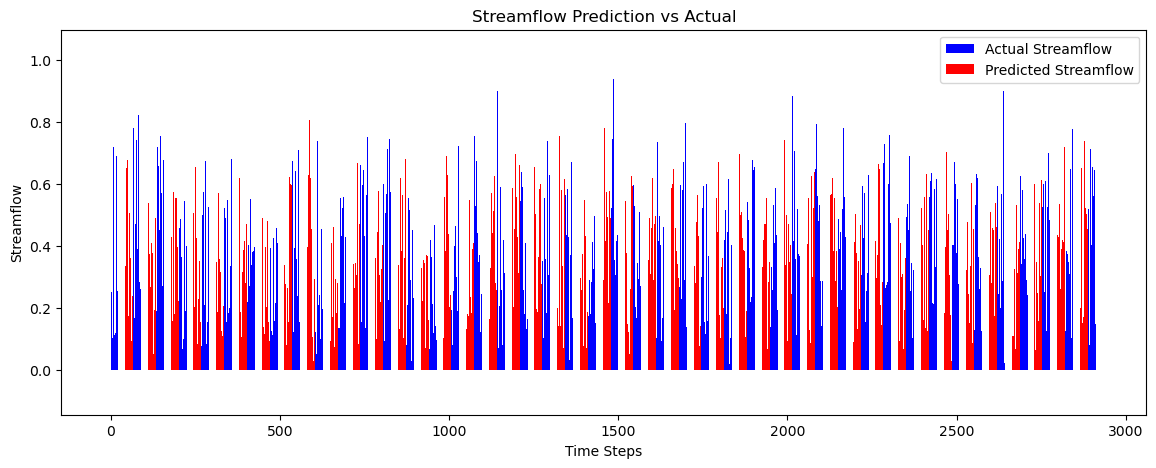

In [142]:
plt.figure(figsize=(14, 5))
index = np.arange(len(y_test))
bar_width = 0.35

plt.bar(index, y_test.flatten(), bar_width, label='Actual Streamflow', color='blue')
plt.bar(index + bar_width, predictions.flatten(), bar_width, label='Predicted Streamflow', color='red')
plt.title('Streamflow Prediction vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Streamflow')
plt.legend()

In [143]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

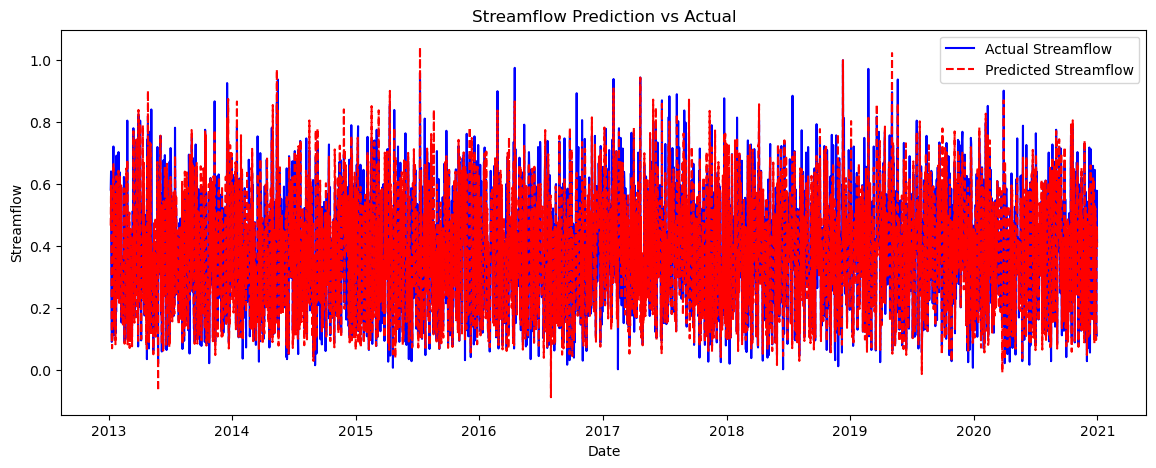

In [144]:
y_test_series = pd.Series(y_test.flatten(), index=data.index[-len(y_test):])
predictions_series = pd.Series(predictions.flatten(), index=data.index[-len(predictions):])

plt.figure(figsize=(14, 5))
plt.plot(y_test_series, label='Actual Streamflow', color='blue')
plt.plot(predictions_series, label='Predicted Streamflow', color='red', linestyle='dashed')
plt.title('Streamflow Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.legend()
plt.show()

## Evaluating the model

In [173]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0052


In [175]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 0.0722
